In [2]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import statistics
import matplotlib.pyplot as plt

**Solution for qsn 1 starts here**

In [2]:
from numpy.random import seed
from numpy.random import randint
# seed random number generator
seed(1)
# generate some integers
values = randint(0, 10, 20)
print(values)

[5 8 9 5 0 0 1 7 6 9 2 4 5 2 4 2 4 7 7 9]


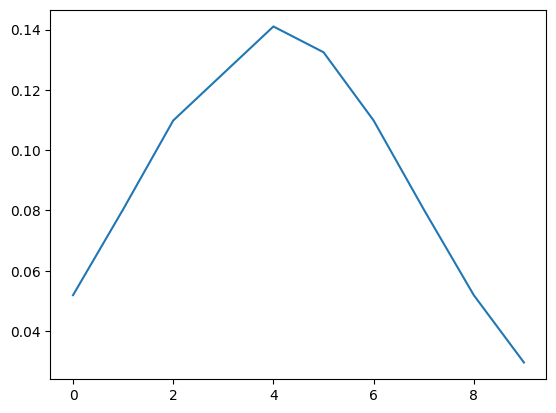

In [3]:
mean = statistics.mean(values)
sd = statistics.stdev(values)
values.sort()
plt.plot(values, norm.pdf(values, mean, sd))
plt.show()

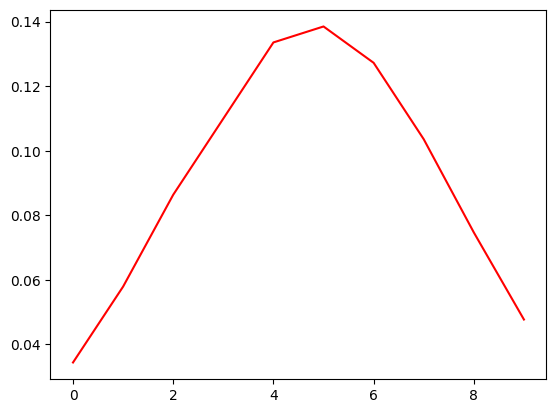

In [4]:
mean = values.mean()
variance = values.var()
p = [values.shape]
p = (1/np.sqrt(2*3.14*variance))*(np.exp(-1*((values - mean)**2) / (2* variance)))

plt.plot(values, p, color = 'red' )

**Solution for qsn 2 starts here**

In [3]:
csvfile = pd.read_csv('assignment-1-2')

In [4]:
csvfile.head()

,Grades,Number of students
0,5,32
1,6,44
2,7,70
3,8,50
4,9,12


In [5]:
csvfile.to_csv('copy_of_' + 'assignment-1-2.csv',index=False)
# copy_csv('assignment-1-2.csv')

In [6]:
file2 = pd.read_csv('copy_of_assignment-1-2.csv')

In [7]:
file2.head()

,Grades,Number of students
0,5,32
1,6,44
2,7,70
3,8,50
4,9,12


In [8]:
file2['Grades'] +=  1

In [9]:
file2.head()

,Grades,Number of students
0,6,32
1,7,44
2,8,70
3,9,50
4,10,12


In [10]:
csvfile['pro'] = csvfile['Grades']*(csvfile['Number of students ']/215 )
# print(csvfile.head())

file2['pro'] = file2['Grades']*(file2['Number of students ']/215)
# file2.head()

def expectation(file):
    return sum(file['pro'])

In [12]:
exp1 = expectation(csvfile)
exp2 = expectation(file2)
print("Expectation of initial data is ",exp1," and that of second data is ",exp2)
# expectation(csvfile)

Expectation of initial data is  6.939534883720929  and that of second data is  7.93953488372093


In [13]:
csvfile['var'] = (csvfile['Grades'] - exp1)**2
# var_sum = sum(csvfile['var'])
file2['var'] = (file2['Grades'] - exp2)**2
def variance(file):
    file['variance'] = file['var'] * (file['var']/sum(file['var']))
    return sum(file['variance'])

In [14]:
var1 = variance(csvfile)
var2 = variance(file2)
print("Variance of initial data is ",var1," and that of second data is ",var2)

Variance of initial data is  6.2910225001596185  and that of second data is  6.291022500159617


**Solution for question 3 starts here**

In [18]:
df = pd.read_csv("assignment-1-3.csv")

In [19]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [20]:
def expectation2(file,topic):
    arr = file[topic].shape
    arr = file[topic]*(file[topic]/sum(file[topic]))
    return sum(arr)

In [21]:
exp_height = expectation2(df,'Height')
exp_weight = expectation2(df,'Weight')
print("Expectation of height is ",exp_height," and of weight is ",exp_weight)
print("Mean of height is ",df['Height'].mean()," and of weight is ",df['Weight'].mean())

Expectation of height is  69.07560088431248  and of weight is  189.03608155317409
Mean of height is  68.95975707921001  and of weight is  186.9907173851


In [22]:
def variance2(file,topic):
    arr = [file[topic].shape]
    arr2 = [file[topic].shape]
    if topic == 'Height' :
        arr = (file[topic] - exp_height)**2
#         print(arr.shape)
        arr2 = arr*(arr/sum(arr))
    else : 
        arr = (file[topic] - exp_weight)**2
        arr2 = arr*(arr/sum(arr))
    return sum(arr2)
def std(file,topic):
    arr = [file[topic].shape]
    n = file[topic].shape[0]
    if topic == 'Height' :
        arr = (file[topic] - file['Height'].mean())**2
        return sum(arr)/n
    else : 
        arr = (file[topic] - file['Weight'].mean())**2
        return sum(arr)/n
#     return sum(arr2)

In [23]:
var_height = variance2(df,'Height')
var_weight = variance2(df,'Weight')
print("Variance of height is ",var_height," and of weight is ",var_weight)
print("St. Deviation of height is ",np.sqrt(std(df,'Height'))," and of weight is ",np.sqrt(std(df,'Weight')))

Variance of height is  23.737865789228376  and of weight is  1103.2501116315075
St. Deviation of height is  2.826404192432897  and of weight is  19.556689727608454


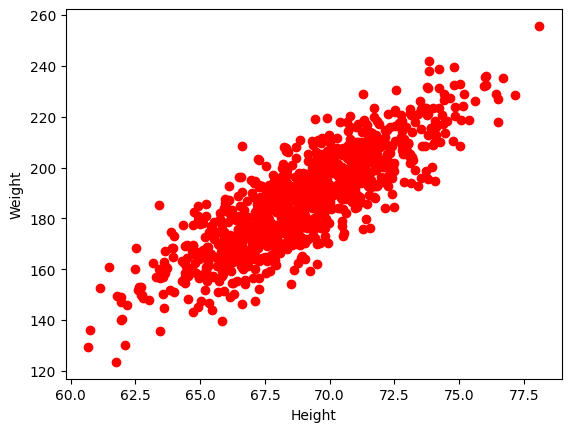

In [24]:
plt.scatter(df['Height'], df['Weight'],  marker = 'o',color='red',)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [25]:
def covariance(file,topic1,topic2):
    n = file[topic1].shape[0]
    x = sum(((file[topic1]-file[topic1].mean())*(file[topic2]-file[topic2].mean())))
    return x/n

In [26]:
cov = covariance(df,'Height','Weight')
print("Covariance of Height and Weight is ",cov)

Covariance of Height and Weight is  46.68731642905485


In [27]:
corr = cov/(var_height*var_weight)
print("Correlation of Height and Weight is ",corr)

Correlation of Height and Weight is  0.0017827205116293953


In [28]:
df.cov()

,Height,Weight
Height,7.996557,46.73405
Weight,46.734050,382.84696


In [29]:
df.var()

Height      7.996557
Weight    382.846960
dtype: float64

**Solution for qsn 4 starts here**